In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
# Statistics
from evaluation.classification.statistics import get_precisions, get_size_list_from_xte
# Visualize
from evaluation.classification.visualize import plot_df_distrib_size

%matplotlib inline
plt.style.use("ggplot")

### --- compare precision with population ---

In [2]:
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform30_dropout/validation_matrix.csv')
resnet50_DBSCAN = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform30_dropout_DBSCAN/validation_matrix.csv')

In [3]:
resnet50_precisions = get_precisions(resnet50)
resnet50_DBSCAN_precisions = get_precisions(resnet50_DBSCAN)

In [4]:
exp_name = ["resnet50", "resnet50_DBSCAN"]
exp_ap = [resnet50_precisions.mean(), 
          resnet50_DBSCAN_precisions.mean()]

In [5]:
df = pd.DataFrame({"exp_ap": exp_ap})
df.index = exp_name
df

,exp_ap
resnet50,0.887021
resnet50_DBSCAN,0.880785


In [6]:
insect_names = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 'Lepidoptera', 'Plecoptera', 'Trichoptera']

In [7]:
df_per_label = pd.DataFrame({"resnet50": resnet50_precisions, 
                             "resnet50_DBSCAN": resnet50_DBSCAN_precisions,})
df_per_label.index = insect_names
df_per_label

,resnet50,resnet50_DBSCAN
Diptera,0.928713,0.916335
Ephemeridae,0.937063,0.920635
Ephemeroptera,0.781570,0.769504
Lepidoptera,0.943163,0.938589
Plecoptera,0.886410,0.880000
Trichoptera,0.845209,0.859649


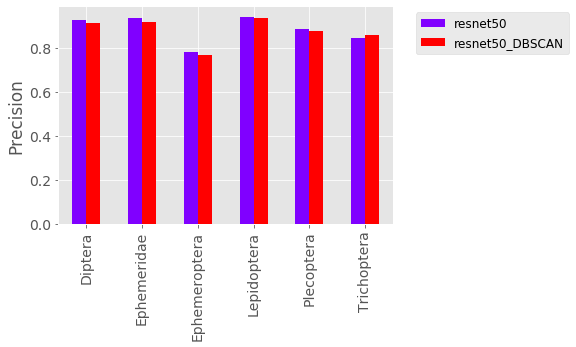

In [8]:
plt.rcParams["font.size"] = 14
df_per_label.plot(kind="bar", y=["resnet50", "resnet50_DBSCAN"], cmap="rainbow")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_DBSCAN/compare_precision_resnet50.png", bbox_inches="tight")

### --- compare accuracy distribution of size ---

In [9]:
cls_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform30_dropout/each_size_df.csv')
cls_each_size_df["order"] = cls_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(cls_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})
insect_size_df = insect_size_df.drop(insect_size_df.index[[0, 1]])

In [10]:
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform30_dropout/all_size_df.csv')
resnet50_DBSCAN = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/resnet50/b20_lr1e-5/crossvalid_20200806_All_uniform30_dropout_DBSCAN/all_size_df.csv')

In [11]:
resnet50 = resnet50.drop(resnet50.index[[0, 1]])
#resnet50_DBSCAN = resnet50_DBSCAN.drop(resnet50_DBSCAN.index[[0, 1]])

In [12]:
insect_size_df["Insect_size"] = resnet50["Insect_size"]
insect_size_df

,order,count,Insect_size
2,7.0,12,205.833333
3,8.0,51,395.039216
4,9.0,131,776.328244
5,10.0,403,1572.317618
6,11.0,1004,2982.721116
7,12.0,740,5730.868919
8,13.0,431,11417.570766
9,14.0,260,23926.192308
10,15.0,21,35455.380952


In [13]:
all_df = pd.DataFrame()
all_df["order"] = insect_size_df["order"]
all_df["count"] = insect_size_df["count"]
all_df["resnet50"] = resnet50["Accuracy"]
all_df["resnet50_DBSCAN"] = np.array(resnet50_DBSCAN["Accuracy"])
all_df

,order,count,resnet50,resnet50_DBSCAN
2,7.0,12,0.916667,1.000000
3,8.0,51,0.901961,0.843137
4,9.0,131,0.778626,0.763359
5,10.0,403,0.821340,0.796526
6,11.0,1004,0.887450,0.879242
7,12.0,740,0.931081,0.934337
8,13.0,431,0.958237,0.973171
9,14.0,260,0.980769,0.987234
10,15.0,21,0.952381,1.000000


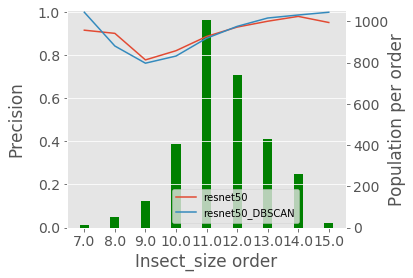

In [14]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7.0", "8.0", "9.0", "10.0", "11.0", "12.0", "13.0", "14.0", "15.0"]

ax1.bar(x_label, all_df["count"], width=0.3, color="g")
ax2.plot(x_label, all_df["resnet50"], label="resnet50")
ax2.plot(x_label, all_df["resnet50_DBSCAN"], label="resnet50_DBSCAN")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.85, 0.), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect_size order")
ax1.set_ylabel("Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per order")
ax2.set_ylim(0., 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_DBSCAN/compare_precision_distrib_of_size.png", bbox_inches="tight")